# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [29]:
import numpy as np
import pandas as pd 
import  matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

titanic_df =pd.read_csv('../titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# Null값을 허용하지 않으므로 fillna()함수 사용해 평균 or 고정값으로 변경

In [32]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('데이터 세트 null 값 개수', titanic_df.isnull().sum().sum())


데이터 세트 null 값 개수 0


In [33]:
print('Sex값분포 : \n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex값분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
D7               1
B39              1
D56              1
E46              1
T                1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [34]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [35]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

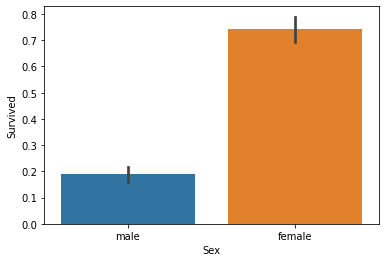

In [36]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

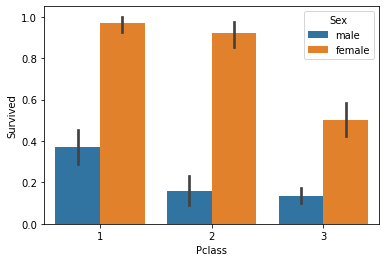

In [37]:
sns.barplot(x='Pclass',y='Survived', hue='Sex',  data=titanic_df)

## 입력 age에 다라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

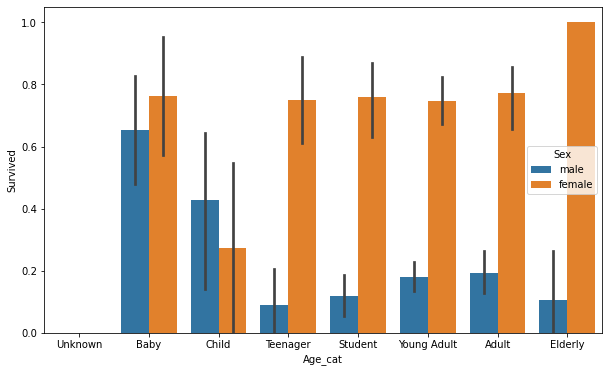

In [38]:
def get_category(age):
    cat = ''
    if age<= -1 :cat = 'Unknown'
    elif age<=5 : cat ='Baby'
    elif age<=12: cat = 'Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat ='Student'
    elif age <=35 : cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat
# 막대 그래프 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식 위에서 생성한 get_category() 함수 바노한값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아 해당하는 cat 반환

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
# titanic_df.drop('Age_cat',axis=1,inplace=True)

In [39]:
# titanic_df[(titanic_df['Age']>=5) & (titanic_df['Age']<=12)]

## 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [40]:
from sklearn import preprocessing

def encode_features(dataDF):
    features= ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le= le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


데이터 전처리를 전체적으로 호출하는 함수는 transform_features()

ㄴ> Null처리, 포매팅, 인코딩 수행하는 내부 함수

In [41]:
#NULL 처리 함수

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True   )
    return df

# 레이블 인코딩 수행

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 앞에서 설정한 데이터 전처리 함수 호출

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df   

In [42]:
#  원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('../titanic_train.csv')
y = titanic_df['Survived']

In [43]:
X = titanic_df.drop(['Survived'],axis=1)
X = transform_features(X)

In [44]:
# 학습 데이터 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 분류 클래스 생성
dt_clf =DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf =LogisticRegression()

#  의사결정나무 학습 예측 평가
dt_clf.fit(X_train,y_train)
dt_pred= dt_clf.predict(X_test)
print('의사결정나무 정확도 {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# 랜덤포레스트 학습 예측 평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도 {0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# 로지스틱회귀 학습 예측 평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도 {0:.4f}'.format(accuracy_score(y_test,dt_pred)))



의사결정나무 정확도 0.7877
랜덤포레스트 정확도 0.7877
로지스틱 회귀 정확도 0.7877


C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 교차검증으로 결정트리 모델 평가

### kfold

In [47]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold객체 생성, 폴드 수만큼예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold교차검증수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X)):
        X_train,X_test = X.values[train_index],X.values[test_index]
        y_train,y_test = y.values[train_index],y.values[test_index]
        
        #Classifier 학습, 예측, 정확도 계산
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증{0} 정확도 : {1:.4f}".format(iter_count,accuracy))

    # 5개 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exe_kfold 호출

exec_kfold(dt_clf)

교차검증0 정확도 : 0.7542
교차검증1 정확도 : 0.7809
교차검증2 정확도 : 0.7865
교차검증3 정확도 : 0.7697
교차검증4 정확도 : 0.8202
평균 정확도: 0.7823


### cross_val_score()

- 요건 StratifiedKfold 사용하기땜에 결과값이 다를 수 있음.

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X, y, cv = 5)

for iter_count,accuracy in enumerate(scores):
    print("교차검증{0} 정확도 : {1:.4f}".format(iter_count,accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))


교차검증0 정확도 : 0.7430
교차검증1 정확도 : 0.7753
교차검증2 정확도 : 0.7921
교차검증3 정확도 : 0.7865
교차검증4 정확도 : 0.8427
평균 정확도: 0.7879


### 그리드 서치

In [52]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[2,3,5,10],
        'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,5,8]       
        }
grid_dclf = GridSearchCV(dt_clf,param_grid=param,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('그리드 서치 최적 하이퍼 파라미터: ',grid_dclf.best_params_)
print('그리드 서치 최적 최고 정확도: ',grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_ 


# 그리드서치 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서 의사결정나무 정확도: ',accuracy)



그리드 서치 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
그리드 서치 최적 최고 정확도:  0.7991825076332119
테스트 세트에서 의사결정나무 정확도:  0.8715083798882681
